# Sumy symboliczne

W tej części poznamy metodę sum symbolicznych, zobaczymy w jaki sposób je rozwiązywać oraz jakie są rekurencyjne formuły na nie. Otrzymamy też kilka ciekawych tożsamości.

## Przykład 1

Znajdź zwartą formułę na sumę liczb całkowitych

$1+2+\cdots+n = g(n)$

Jak możemy wyznaczyć $g(n)$?

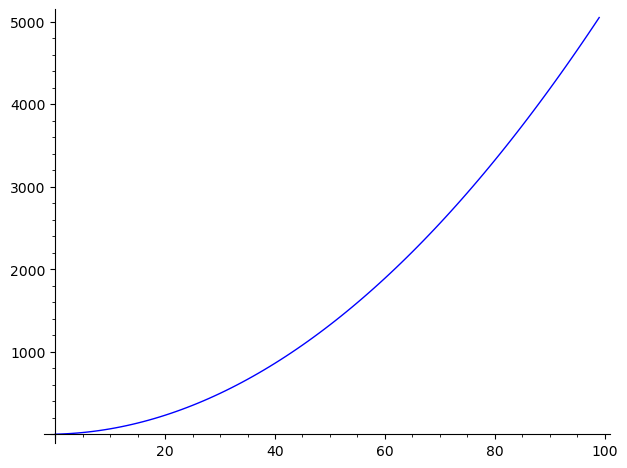

In [3]:
def Sum1(n):
    s=0
    for i in [1..n]:
        s+=i
    return s

list_plot([Sum1(k) for k in [1..100]],plotjoined=True)

Z wykresu odczytujemy, że wzrost ciągu jest raczej powolny (typu wielomianowego). Spróbujmy sprawdzić jaki jest to wielomian ze względu na zmienną $n$.

In [4]:
a,b,c,x=var('a,b,c,x') #inicjalizujemy wielomian stopnia 2 o wspołczynnikach a,b,c i zmiennej x

In [5]:
solve([(a*x^2+b*x+c).subs(x=m)==Sum1(m) for m in [1..10]],(a,b,c)) #rozwiązujemy ze względu na a,b,c

[[a == (1/2), b == (1/2), c == 0]]

**Hipoteza**

$1+2+\cdots+n = \frac{1}{2}n^2+\frac{1}{2}n$

In [6]:
n,k=var('n,k')

### Dowód przez indukcję

In [7]:
def Sum1Symb(n):
    return 1/2*n^2+1/2*n

In [8]:
#Weryfikacja warunku początkowego
Sum1(0)==Sum1Symb(0)

True

In [9]:
#Formułowanie kroku indukcji
inductive_step=Sum1Symb(n)+(n+1)==Sum1Symb(n+1)
pretty_print(inductive_step)

1/2*n^2 + 3/2*n + 1 == 1/2*(n + 1)^2 + 1/2*n + 1/2

In [10]:
#Dowodzenie przez pełne uproszczenie (nie do końca działa jak planowaliśmy)
simplified = inductive_step.expand().simplify_full()
pretty_print(simplified)

1/2*n^2 + 3/2*n + 1 == 1/2*n^2 + 3/2*n + 1

In [11]:
#To również nie działa pomyślnie...
common_factors = inductive_step.collect_common_factors()
pretty_print(common_factors)

1/2*n^2 + 3/2*n + 1 == 1/2*(n + 1)^2 + 1/2*n + 1/2

In [12]:
#Ostateczne rozwiązanie - ekspansja różnicy stron
(inductive_step.lhs()-inductive_step.rhs()).expand()

0

## Co dalej?

Co w przypadku wyrażeń wyższych stopni? Czy zawsze istnieje wyrażenie wielomianowe ze zmienną $n$, które spełnia

$$1^k+2^k+\cdots+n^k = P_{k}(n)$$

In [13]:
#rozgrzewka dla k=2
k=2
vartup=var(''.join(['a'+str(m)+' ' for m in [0..(k+1)]]))
x=var('x')
pol=sum([vartup[i]*x^i for i in [0..(k+1)]])
pretty_print(pol)

a3*x^3 + a2*x^2 + a1*x + a0

In [14]:
vartup=var(''.join(['a'+str(m)+' ' for m in [0..(k+1)]]))
type(vartup[0])

<class 'sage.symbolic.expression.Expression'>

In [15]:
#Ogólna suma stopnia k
def Sumk(n,k):
    s=0
    for i in [1..n]:
        s+=i^k
    return s

In [16]:
#znajdowanie współczynników metodą solve
solve([(pol).subs(x=m)==Sumk(m,2) for m in [1..10]],vartup)

[[a0 == 0, a1 == (1/6), a2 == (1/2), a3 == (1/3)]]

## Algorytm dla dowolnego stopnia

In [17]:
def ProducePol(k):
    '''Ta funkcja generuje współczynniki wielomianu P_k(n)=a_(k+1)*n^k+...+a_0
    takie, że P_k(n)=1^k+...+n^k
    '''
    vartup=var(''.join(['a'+str(m)+' ' for m in [0..(k+1)]]))
    x=var('x')
    pol=sum([vartup[i]*x^i for i in [0..(k+1)]])
    def Sumk(n,k):
        s=0
        for i in [1..n]:
            s+=i^k
        return s
    solobj=solve([(pol).subs(x=m)==Sumk(m,k) for m in [1..(k+2)]],vartup)
    return sum([x^i*solobj[0][i].rhs() for i in [0..(k+1)]])

In [18]:
#Wydruk k-wielomianów dla k=1,2,3,4,5
pretty_print([(k,ProducePol(k).factor()) for k in [1..5]])

[(1, 1/2*(x + 1)*x),
 (2, 1/6*(2*x + 1)*(x + 1)*x),
 (3, 1/4*(x + 1)^2*x^2),
 (4, 1/30*(3*x^2 + 3*x - 1)*(2*x + 1)*(x + 1)*x),
 (5, 1/12*(2*x^2 + 2*x - 1)*(x + 1)^2*x^2)]

In [19]:
latex(ProducePol(11).factor())

\frac{1}{24} \, {\left(2 \, x^{8} + 8 \, x^{7} + 4 \, x^{6} - 16 \, x^{5} - 5 \, x^{4} + 26 \, x^{3} - 3 \, x^{2} - 20 \, x + 10\right)} {\left(x + 1\right)}^{2} x^{2}

$\frac{1}{24} \, {\left(2 \, x^{8} + 8 \, x^{7} + 4 \, x^{6} - 16 \, x^{5} - 5 \, x^{4} + 26 \, x^{3} - 3 \, x^{2} - 20 \, x + 10\right)} {\left(x + 1\right)}^{2} x^{2}$

In [20]:
pretty_print(ProducePol(11).factor())

1/24*(2*x^8 + 8*x^7 + 4*x^6 - 16*x^5 - 5*x^4 + 26*x^3 - 3*x^2 - 20*x + 10)*(x + 1)^2*x^2

Musimy dostarczyć indukcyjny dowód na to, że znaleziony przez nas wielomian jest właściwy. Otrzymujemy to następującą procedurą:

In [21]:
def ProduceInductiveCertificate(k):
    '''Ta procedure weryfikuje wielomian znaleziony procedurą ProducePolCoefficient'''
    pol=ProducePol(k)
    n=var('n')
    return pol.subs(x=n)+(n+1)^k-pol.subs(x=n+1) #krok indukcyjny

In [22]:
#Dowód, że dla ustalonego k wielomian znaleziony metodą solve jest prawidłowy.
for k in [1..10]:
    print(bool(ProduceInductiveCertificate(k).expand()==0))

True
True
True
True
True


True
True
True


True
True


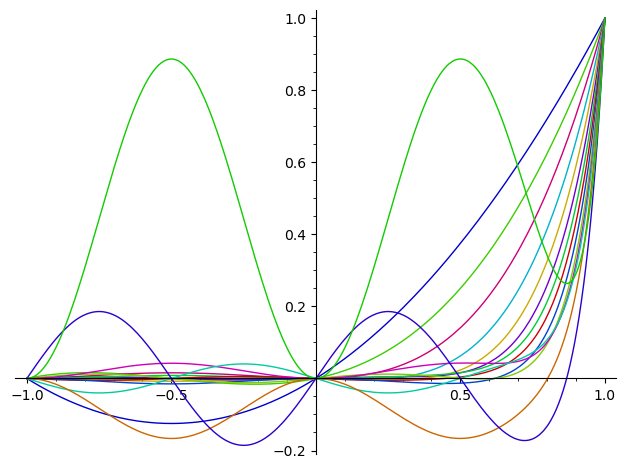

In [23]:
#Ciekawe własności funkcji P_k(n) wielomianowej na przedziale (-1,1)
plot([ProducePol(k) for k in [1..15]],(x,-1,1))

In [24]:
#Ciekawe własności całki
[(k,integrate(ProducePol(k),(x,-1,1))) for k in [1..20]]

[(1, 1/3),
 (2, 1/3),
 (3, 4/15),
 (4, 1/5),
 (5, 10/63),
 (6, 1/7),
 (7, 2/15),
 (8, 1/9),
 (9, 14/165),
 (10, 1/11),
 (11, 514/4095),
 (12, 1/13),
 (13, -2/21),
 (14, 1/15),
 (15, 242/255),
 (16, 1/17),
 (17, -21734/3591),
 (18, 1/19),
 (19, 43694/825),
 (20, 1/21)]

**Hipoteza**

$\int_{-1}^{1}P_{2k}(x)dx = \frac{1}{2k+1}$

**Wyzwanie**

Udowodnij hipotezę dla dowolnego $k$.

**Pytanie**

Czy $P_{k}(x)$ jest zawsze wielomianem i jak możemy to udowodnić?

## Wyprowadzenie formuł z wykorzystaniem wielomianów Bernoulliego

In [25]:
#inicjalizacja zmiennych
x,k,n=var('x,k,n')
sumtot=sum(exp(k*x),k,0,n)
pretty_print(sumtot)

(e^(n*x + x) - 1)/(e^x - 1)

In [26]:
bergen=(x/(exp(x)-1)) #funkcja generująca liczby Bernoulliego B_n
print((e^(n*x + x) - 1)/x*bergen-sumtot) #wykładnicza funkcja generująca dla sum S_k(n) jest iloczynem funkcji generujących

0


In [27]:
#Weryfikacja numeryczna
taylor(bergen,x,0,10)-sum([bernoulli(int(k))/factorial(int(k))*x^k for k in [0..10]])

0

In [28]:
#Weryfikacja numeryczna
(taylor((e^(n*x + x) - 1)/x,x,0,10)-sum([(n+1)^(k+1)/factorial(k+1)*x^(k) for k in [0..10]])).expand()

0

In [29]:
#Definiujemy wielomian Bernoulliego
def BernoulliPol(x,n):
    return sum([binomial(n,m)*bernoulli(m)*x^(n-m) for m in [0..n]])

In [30]:
#Przykła
BernoulliPol(x,10)

x^10 - 5*x^9 + 15/2*x^8 - 7*x^6 + 5*x^4 - 3/2*x^2 + 5/66

In [31]:
#W punkcie 0 wielomian Bernoulliego jest liczbą Bernoulliego.
[BernoulliPol(0,m)-bernoulli(m) for m in [1..10]]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [32]:
#W SageMath istnieje wbudowana funkcjonalność
bernoulli_polynomial(x,10)

x^10 - 5*x^9 + 15/2*x^8 - 7*x^6 + 5*x^4 - 3/2*x^2 + 5/66

Łatwo sprawdzić, że dla wielomianu Bernoulliego
$$B_{n}(x) = \sum_{m=0}^{n}\binom{n}{m}B_{m} x^{n-m}$$
zachodzi następująca równość
$$S_{k}(n) = \frac{1}{k+1}\left(B_{k+1}(n+1)-B_{k+1}(0)\right)$$

In [33]:
#Weryfikacja numeryczna
(sum(k^4,k,1,n)-1/(4+1)*(bernoulli_polynomial(n+1,4+1)-bernoulli(4+1))).expand()

0

In [34]:
#Weryfikacja numeryczna
t,x=var('t,x')
(taylor(t*e^(x*t)/(e^t-1),t,0,20)-sum([bernoulli_polynomial(x,n)*t^n/factorial(n) for n in [0..20]])).expand()

0

In [35]:
pretty_print(t*e^(x*t)/(e^t-1))

t*e^(t*x)/(e^t - 1)

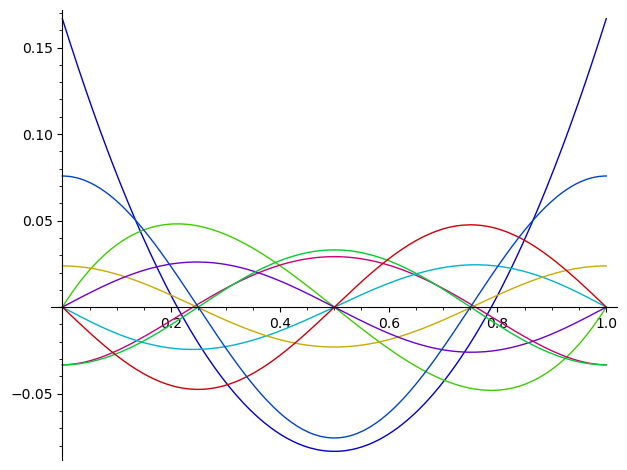

In [36]:
#Grafy wielomianów Bernoulliego mają ciekawy wygląd na odcinku (0,1)
plot([bernoulli_polynomial(x,n) for n in [2..10]],(x,0,1))

Obserwacja

$$\int_{a}^{b} B_{n}(x)dx = \frac{B_{n+1}(b)-B_{n+1}(a)}{n+1}$$ (wynika z $B_{n}(x+1)-B_{n}(x)= n x^{n-1}$)

Skoro $S_{k}(n) = \frac{1}{k+1}(B_{k+1}(n+1)-B_{k+1}(0))$, zachodzi

$$\int_{-1}^{1} S_{k}(x) dx = \int_{-1}^{1}\left(\frac{1}{k+1}(B_{k+1}(x+1)-B_{k+1}(0))\right)dx=$$
$$=\int_{0}^{2}\left(\frac{1}{k+1}(B_{k+1}(x+1)-B_{k+1}(0))\right)d(x+1)$$
$$=\frac{1}{k+1}\int_{0}^{2}\left((B_{k+1}(y)-B_{k+1}(0))\right)dy$$
$$=\frac{1}{k+1}\left(\frac{B_{k+2}(2)-B_{k+2}(0)}{k+2}\right)-\frac{2}{k+1}B_{k+1}(0)$$

In [37]:
#Numeryczna weryfikacja kroku
m=var('m')
def CheckInt1(k):
    return integrate(sum(m^k,m,1,x),x,-1,1)-integrate(1/(k+1)*(bernoulli_polynomial(x+1,k+1)-bernoulli_polynomial(0,k+1)),x,-1,1)

[CheckInt1(k) for k in [1..10]]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [38]:
def CheckInt2(k):
    return integrate(sum(m^k,m,1,x),x,-1,1)-(1/((k+1)*(k+2))*(bernoulli_polynomial(2,k+2)-bernoulli_polynomial(0,k+2))-2/(k+1)*bernoulli_polynomial(0,k+1))

[CheckInt2(k) for k in [1..10]]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Z $B_{n}(x+1)-B_{n}(x)= n x^{n-1}$ wynika

$$B_{k+2}(2)-B_{k+2}(1) = k+2$$
$$B_{k+2}(1)-B_{k+2}(0) = 0$$
$$B_{k+2}(2)-B_{k+2}(0) = k+2$$
$$B_{k+2}(2) = k+2+B_{k+2}(0)$$

Zatem
$$\frac{1}{k+1}\left(\frac{B_{k+2}(2)-B_{k+2}(0)}{k+2}\right)-\frac{2}{k+1}B_{k+1}(0)=\frac{1}{k+1}(1-2B_{k+1}(0))$$


Więc

$$\int_{-1}^{1} S_{k}(x) dx = \frac{1}{k+1}(1-2B_{k+1}(0)) = \left\{\begin{array}{cc} \frac{1}{k+1} & ,2\mid k\\ \frac{1-2B_{k+1}}{k+1} & ,2\nmid k\end{array}\right.$$

In [39]:
def Stildek(k,x):
    m=var('m')
    return (k+1)*sum(m^k,m,1,x)

In [40]:
#Heurystyka numeryczna
[integrate(Stildek(2*r,x)*Stildek(2*r+1,x),(x,-1,1)) for r in [1..15]]

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

**Hipoteza**
$$\int_{-1}^{1}\tilde{S}_{2k}(x)\tilde{S}_{2k+1}(x)dx = k$$
gdzie $\tilde{S}_{k}(x) = (k+1)S_{k}(x)$

## Formalny punkt widzenia na wielomiany Bernoulliego

In [51]:
#Zdefiniujmy abstrakcyjny operator różnicy
def DiffOp(f,x):
    return f(x+1)-f(x)

In [52]:
#Możemy stosować rachunek lambda dla krótszego zapisu (programowanie funkcyjne)
f=lambda x: x^2
delta=lambda f: lambda y: DiffOp(f,y)

In [66]:
x=var('x')
f=sin
print(delta(delta(delta(sin)))(x))
print(nest(delta,10,f)(x))

sin(x + 3) - 3*sin(x + 2) + 3*sin(x + 1) - sin(x)
sin(x + 10) - 10*sin(x + 9) + 45*sin(x + 8) - 120*sin(x + 7) + 210*sin(x + 6) - 252*sin(x + 5) + 210*sin(x + 4) - 120*sin(x + 3) + 45*sin(x + 2) - 10*sin(x + 1) + sin(x)


In [60]:
#Ekspansja
delta(f)(x).expand()

sin(x + 1) - sin(x)

In [61]:
#Iteracja pozwala uzyskać wyższe różnice
g=lambda x: x^3
[nest(delta,k,g)(x).expand() for k in [0..3]]

[x^3, 3*x^2 + 3*x + 1, 6*x + 6, 6]

In [62]:
#Definiujemy operator pomocniczy
mdelta=lambda f: lambda y:-delta(f)(y)

Wielomian Bernoulliego $B_n(x)$ możemy obliczyć w następujący formalny sposób.

Niech $D=\frac{d}{dx}$. Zachodzi tożsamość

$$\frac{D}{e^{D}-1}(x^n) = B_{n}(x)$$
gdzie $e^D$ jest formalny operatorem różniczkowym $\frac{D}{e^{D}-1} = 1-1/2 D+1/12 D^2-1/720D^4+...$

In [63]:
#Weryfikacja numeryczna
D=var('D')
taylor(D/(exp(D)-1),D,0,10)

1/47900160*D^10 - 1/1209600*D^8 + 1/30240*D^6 - 1/720*D^4 + 1/12*D^2 - 1/2*D + 1

Formalny operator $e^D-1$ działa na szeregu $f$ jako $f(x+1)-f(x)$, więc

$$e^D-1 = \Delta.$$

Otrzymujemy

$$\frac{D}{e^D-1} = \frac{log(\Delta+1)}{\Delta} = \sum_{n=0}^{\infty}\frac{(-\Delta)^n}{n+1}$$ (tożsamość różnicowa)

In [64]:
#Numeryczna weryfikacja dla 10-tego wielomianu Bernoulliego
m=10
g=lambda x: x^m
sum([nest(mdelta,k,g)(x)/(k+1) for k in [0..10]]).expand()

x^10 - 5*x^9 + 15/2*x^8 - 7*x^6 + 5*x^4 - 3/2*x^2 + 5/66

In [65]:
bernoulli_polynomial(x,10)

x^10 - 5*x^9 + 15/2*x^8 - 7*x^6 + 5*x^4 - 3/2*x^2 + 5/66

**Ćwiczenie** 

Udowodnij, że istotnie zachodzi własność $B_{n}(x+1)-B_{n}(x)= n x^{n-1}$